In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Linear Regression

Formulas Used:
y=mx+b
mean(y)-m*mean(x)=b


m=sum((xi-mean(x))(yi-mean(y)))/(sum(xi-mean(x))^2)

In [2]:
class LinearRegressor2D:
    def __init__(self):
        self.m=0
        self.b=0
    def fit(self,X_train,y_train):
        xbar=X_train.mean()
        ybar=y_train.mean()
        sum1=0
        sum2=0
        for xi,yi in zip(X_train,y_train):
            sum1+=(xi-xbar)*(yi-ybar)
            sum2+=(xi-xbar)**2
        self.m=sum1/sum2
        self.b=ybar-self.m*xbar
    def predict(self,X_test):
        return self.m*X_test+self.b
df=pd.read_csv('Experience-Salary.csv')
        

In [3]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


Text(0, 0.5, 'Salary')

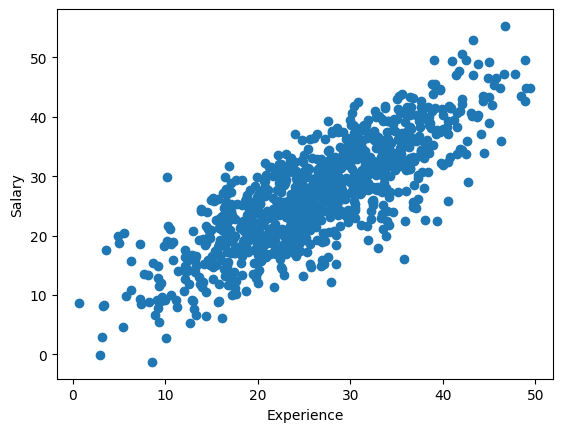

In [5]:
X=df['exp(in months)']
y=df['salary(in thousands)']
plt.scatter(X,y)
plt.xlabel('Experience')
plt.ylabel('Salary')

Data Seems Like that Salary increases with Experience

In [6]:
import seaborn as sns

<Axes: ylabel='exp(in months)'>

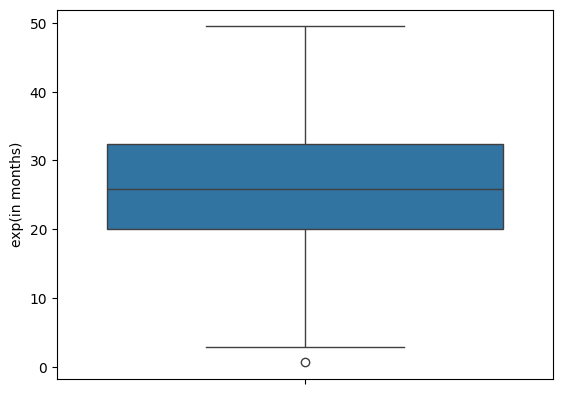

In [7]:
sns.boxplot(X)

In [8]:
per25=X.quantile(0.25)
per75=X.quantile(0.75)
iqr=per75-per25
lower_limit=iqr-per25
upper_limit=iqr+per75

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
mask = (X_train >= lower_limit) & (X_train<= upper_limit)

X_train = X_train[mask].values
y_train = y_train[mask].values


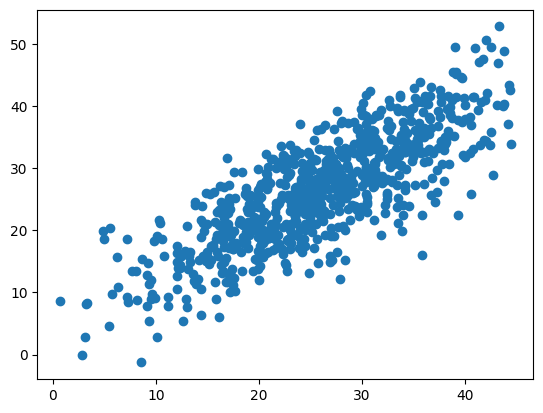

In [10]:
plt.scatter(X_train,y_train)

In [11]:
my_lr=LinearRegressor2D()
my_lr.fit(X_train,y_train)
from sklearn.metrics import root_mean_squared_error as rmse
rmse(y_test,my_lr.predict(X_test))

5.2545021533223

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1),y_train)
rmse(y_test,lr.predict(np.array(X_test).reshape(-1,1)))

5.254502153322301

We can Find that RMSE scores produced by both models is almost same.

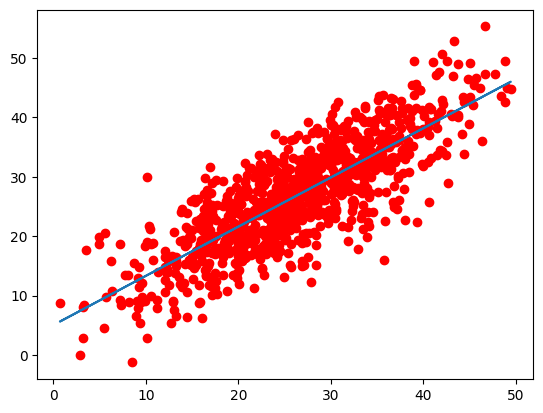

In [13]:
plt.scatter(X,y,color='red')
plt.plot(X,my_lr.predict(X))